In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz

## Question 0:

$s = \log(\sum_{i = 1}^{I}e^{v_i - v^* +v^*}) = v^* + \log(\sum_{i = 1}^{I}e^{v_i - v^*}) $


With $v^*  = max{v_i} ,i \in I$ . **This** was seen in the course. In the end the arguments in the exponential are positive so the log can be applied.

In [41]:
def log_sum_exp(v):
  v_max = np.max(v)
  return v_max + np.log(sum(np.exp(v-v_max))) 
print('For v = [-1234,-1235] we get: ' + str(log_sum_exp([-1234,-1235])))

For v = [-1234,-1235] we get: -1233.6867383124818


## Question 1

###1. 
Let $N$ be the different states.

Let $X_k$ be the true robot position after k iterations

Let $Y_k$ be the state detected by the sensor.


Let $E$ be a variable such that: $P(E=0) = 1- \epsilon$
and $P(E = 1) = \epsilon$

Let $U$ be a random variable following a uniform distribution on 
${1,...N}$

Let $W$ be a random variable such that: $P(W=1) = w$
and $P(W = 0) = 1 - w$


So we have according to the text:

$X_{k+1} = R[(E X_k + (1-E)(X_k + 1)),N] + 1$

$Y_k = W X_k + U(1-W)$

$R(a,N)$ being the rest of the euclidiant division of $a$ by $N$ ie. we have to work with the modulo







### 2.
The conditional probability table is given by $A_{i,j} = \mathbb{P}(X_{k+1} = i|X_{k} = j)$ so with 1. we conclude that it is of the following form :

\begin{pmatrix} \epsilon & 0 & ...&1 - \epsilon \\
                1-\epsilon & \epsilon &...& 0\\
                .&1-\epsilon\\
                .\\
               .\\
               0& .&.&\epsilon\end{pmatrix}

### 3. 
We write M the number of total observations.
* (a) $\mathbb{P}(x_k|y_{1:k})$
* (b) $\mathbb{P}(x_k|y_{1:M})$
* (c) $\mathbb{P}(x_{k+1}|y_{1:k})$
* (d) $\mathbb{P}(y_{k+1}|y_{1:k})$
* (e) $\mathbb{P}(x_0|y_{1:k})$
* (f) $argmax_{x_k}\mathbb{P}(x_k|y_{1:k})$
* (e) $argmax_{x_{1:k}}\mathbb{P}(x_{1:k}|y_{1:k})$









###4.

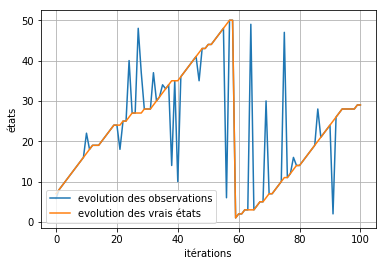

In [42]:
def simulation (w,eps,N, n_iter):
  X = np.random.choice(np.arange(1,N+1), p = np.ones(N)/N)
  List_X = [X]
  W = np.random.choice(np.array([1,0]), p = np.array([w, 1-w]))
  U = np.random.choice(np.arange(1,N+1), p = np.ones(N)/N)
  y_0 = w*X + U*(1-W)
  List_y = [y_0]
  
  for i in range (n_iter):
    
    E = np.random.choice(np.array([1,0]), p = np.array([eps, 1-eps]))
    X = (E*X + (1-E)*(X+1)) % N 
    W = np.random.choice(np.array([1,0]), p =np.array([w, 1-w]))
    U = np.random.choice(np.arange(1,N+1), p = np.ones(N)/N)
    y = W*X + U*(1-W)
    List_y.append(y)
    List_X.append(X)
    
  List_X = [u + 1 for u in List_X]
  List_y = [u + 1 for u in List_y]

  plt.plot(np.arange(len(List_y)), List_y, label = 'evolution des observations')
  plt.plot(np.arange(len(List_X)), List_X, label = 'evolution des vrais états')
  plt.ylabel('états')
  plt.xlabel('itérations')
  plt.legend()
  plt.grid()
  plt.show()
  
simulation(0.8,0.3,50,100)

In [43]:
N = 50
eps = 0.3
col_1 = np.zeros(N)
col_1[0] = eps
col_1[1] = 1-eps
row_1 = np.zeros(N)
row_1[0] = eps
A = toeplitz(col_1, row_1)
A[0][A.shape[0]-1] = 0.7
print(A)

[[0.3 0.  0.  ... 0.  0.  0.7]
 [0.7 0.3 0.  ... 0.  0.  0. ]
 [0.  0.7 0.3 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.3 0.  0. ]
 [0.  0.  0.  ... 0.7 0.3 0. ]
 [0.  0.  0.  ... 0.  0.7 0.3]]


In [0]:
def forwardpass(A,w,observations):
  ###Initialisation
  B = np.ones(A.shape)*((1-w)/N) + np.eye(A.shape[0])*w
  pi = np.ones(N)/N
  log_alpha_kk1 = np.log(pi)
  log_alpha_kk = log_alpha_kk1 + np.log(B[observations[0]-1])
  
  for i in range(1,len(observations)):
    v_max = np.max(log_alpha_kk)
    log_alpha_kk1 = v_max + np.log(A.dot(np.exp(log_alpha_kk-v_max)))
    p_yk_xk = B[observations[i]-1]
    log_alpha_kk = np.log(p_yk_xk) + log_alpha_kk1
  result = np.exp(log_alpha_kk)
  return result

 
def backwardpass(A,w,observations):
  ###Initialisation
  B = np.ones(A.shape)*((1-w)/N) + np.eye(A.shape[0])*w
  log_beta_kk1 = np.zeros(N)
  log_beta_kk = np.log(B[observations[len(observations)-1]-1]+ log_beta_kk1)
  for i in range(1,len(observations)):
    v_max = np.max(log_beta_kk)
    log_beta_kk1 = v_max + np.log(A.T.dot(np.exp(log_beta_kk-v_max)))
    log_beta_kk = log_beta_kk1 + np.log(B[observations[len(observations)-i-1]-1])
  return np.exp(log_beta_kk1), np.exp(log_beta_kk)

###5.


$\mathbb{P}(x_{k}|y_{1:k})$ est égal à $\alpha_{k|k}(x_k)$ à une constante près mais comme c'est une densité de probabilité on peut simplement renormaliser $\alpha_{k|k}.$

In [65]:
alpha_kk = forwardpass(A, 0.3,[1,2,3,4,5,6])
PxkY1k = alpha_kk/np.sum(alpha_kk)
print('Voici P(xk|y1:k):')
print(PxkY1k)

Voici P(xk|y1:k):
[4.72276797e-08 1.96827423e-07 7.86771010e-06 3.92005741e-04
 1.95999466e-02 9.79997961e-01 4.48901837e-08 4.48901837e-08
 4.48901837e-08 4.48901837e-08 4.48901837e-08 4.48901837e-08
 4.48901837e-08 4.48901837e-08 4.48901837e-08 4.48901837e-08
 4.48901837e-08 4.48901837e-08 4.48901837e-08 4.48901837e-08
 4.48901837e-08 4.48901837e-08 4.48901837e-08 4.48901837e-08
 4.48901837e-08 4.48901837e-08 4.48901837e-08 4.48901837e-08
 4.48901837e-08 4.48901837e-08 4.48901837e-08 4.48901837e-08
 4.48901837e-08 4.48901837e-08 4.48901837e-08 4.48901837e-08
 4.48901837e-08 4.48901837e-08 4.48901837e-08 4.48901837e-08
 4.48901837e-08 4.48901837e-08 4.48901837e-08 4.48901837e-08
 4.48901837e-08 4.48901837e-08 4.48901837e-08 4.48901837e-08
 4.48901837e-08 4.48901837e-08]


$\mathbb{P}(x_{k}|y_{1:M})$ est proportionnel à $\gamma_{k|k}(x_k) = \alpha_{k|k}(x_k)*\beta_{k|k+1}(x_k)$ donc on peut procéder de la manière suivante de façon analogue à juste avant. 

In [57]:
alpha_kk = forwardpass(A, 0.3,[1,2,3,4,5,6])
beta_kk1 = backwardpass(A,0.3,[7,8,9,10,11,12])[0]
PxkY1M = alpha_kk*beta_kk1/np.sum(alpha_kk*beta_kk1)
print('Voici P(xk|y1:M):')
print(PxkY1M)

Voici P(xk|y1:M):
[4.43996873e-08 1.85041401e-07 7.39659180e-06 3.68532446e-04
 1.84263023e-02 9.21315705e-01 4.10777703e-02 1.84263023e-02
 3.68532446e-04 7.39659180e-06 1.85041401e-07 4.43996873e-08
 4.22021605e-08 4.22021605e-08 4.22021605e-08 4.22021605e-08
 4.22021605e-08 4.22021605e-08 4.22021605e-08 4.22021605e-08
 4.22021605e-08 4.22021605e-08 4.22021605e-08 4.22021605e-08
 4.22021605e-08 4.22021605e-08 4.22021605e-08 4.22021605e-08
 4.22021605e-08 4.22021605e-08 4.22021605e-08 4.22021605e-08
 4.22021605e-08 4.22021605e-08 4.22021605e-08 4.22021605e-08
 4.22021605e-08 4.22021605e-08 4.22021605e-08 4.22021605e-08
 4.22021605e-08 4.22021605e-08 4.22021605e-08 4.22021605e-08
 4.22021605e-08 4.22021605e-08 4.22021605e-08 4.22021605e-08
 4.22021605e-08 4.22021605e-08]


 $argmax_{x_k}\mathbb{P}(x_k|y_{1:k})$ se calcule en prenant l'argmax du résultat obtenu deux cellules plus haut.


In [58]:
print('argmax_xk P(xk|y1:k)=' + str(np.argmax(PxkY1k)+ 1))

argmax_xk P(xk|y1:k)=6


### 6.

###1. 

Here is the new scenario: 


Let $N$ be the different states.

Let $X_k$ be the true robot position after k iterations

Let $Y_k$ be the state detected by the sensor.


Let $E$ be a variable such that: $P(E=0) = 1- \epsilon$
and $P(E = 1) = \epsilon$

Let $U$ be a random variable following a uniform distribution on 
${1,...N}$

Let $W$ be a random variable such that: $P(W=1) = w$
and $P(W = 0) = 1 - w$

Let $V$ be a random variable following a uniform distribution on 
${1,...N}$

Let $K$ be a random variable such that: $P(K=1) = \kappa$
and $P(K = 0) = 1 - \kappa$


So we have according to the text:

$X_{k+1} = (1-K)(R[(E X_k + (1-E)(X_k + 1)),N] + 1) + KV$

$Y_k = W X_k + U(1-W)$

$R(a,N)$ being the rest of the euclidiant division of $a$ by $N$ ie. we have to work with the modulo


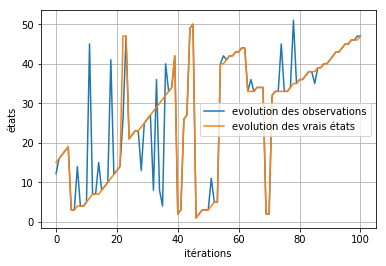

In [59]:
def simulation_2 (w,eps,N, n_iter,kappa):
  X = np.random.choice(np.arange(1,N+1), p = np.ones(N)/N)
  List_X = [X]
  W = np.random.choice(np.array([1,0]), p = np.array([w, 1-w]))
  U = np.random.choice(np.arange(1,N+1), p = np.ones(N)/N)
  y_0 = w*X + U*(1-W)
  List_y = [y_0]
  
  for i in range (n_iter):
    
    E = np.random.choice(np.array([1,0]), p = np.array([eps, 1-eps]))
    K = np.random.choice(np.array([1,0]), p = np.array([kappa, 1-kappa]))
    V = np.random.choice(np.arange(0,N), p = np.ones(N)/N)
    
    X = (1-K)*((E*X + (1-E)*(X+1)) % N ) + K*V
    
    W = np.random.choice(np.array([1,0]), p =np.array([w, 1-w]))
    U = np.random.choice(np.arange(1,N+1), p = np.ones(N)/N)
    
    y = W*X + U*(1-W)
    
    List_y.append(y)
    List_X.append(X)
    
  List_X = [u + 1 for u in List_X]
  List_y = [u + 1 for u in List_y]

  plt.plot(np.arange(len(List_y)), List_y, label = 'evolution des observations')
  plt.plot(np.arange(len(List_X)), List_X, label = 'evolution des vrais états')
  plt.ylabel('états')
  plt.xlabel('itérations')
  plt.legend()
  plt.grid()
  plt.show()
  
simulation_2(0.8,0.3,50,100,0.1)

The transition matrix has changed so here we have to define a new one.

In this Question the transition matrix is equal to:


$B = \begin{pmatrix}
        (1-\kappa) \epsilon+ \frac{\kappa}{N}&\frac{\kappa}{N}& \frac{\kappa}{N}&.&(1-\kappa)(1-\epsilon) + \frac{\kappa}{N}\\
        (1-\kappa)(1-\epsilon) + \frac{\kappa}{N} &(1-\kappa) \epsilon+ \frac{\kappa}{N}&\frac{\kappa}{N}&.&\frac{\kappa}{N}\\
         \frac{\kappa}{N} &(1-\kappa)(1-\epsilon) + \frac{\kappa}{N}&(1-\kappa) \epsilon+ \frac{\kappa}{N}&.&\frac{\kappa}{N}\\
         .&.&.&.&\frac{\kappa}{N}\\
         \frac{\kappa}{N}&.&.&(1-\kappa)(1-\epsilon) + \frac{\kappa}{N}&(1-\kappa) \epsilon+ \frac{\kappa}{N}\\
     \end{pmatrix}
     $

In [67]:
N = 50
eps = 0.3
kappa = 0.1
col = np.ones(N)*(kappa)/N
col[0] += (1-kappa)*eps
col[1] += (1-kappa)*(1-eps)
row = np.ones(N)*(kappa)/N
row[0] += eps*(1-kappa)
A_2 = toeplitz(col, row)
A_2[0][N-1] = (1-kappa)*(1-eps) + kappa/N
print(A_2)

[[0.272 0.002 0.002 ... 0.002 0.002 0.632]
 [0.632 0.272 0.002 ... 0.002 0.002 0.002]
 [0.002 0.632 0.272 ... 0.002 0.002 0.002]
 ...
 [0.002 0.002 0.002 ... 0.272 0.002 0.002]
 [0.002 0.002 0.002 ... 0.632 0.272 0.002]
 [0.002 0.002 0.002 ... 0.002 0.632 0.272]]


In [0]:
def forwardpass_2(A,w,observations):
  ###Initialisation
  B = np.ones(A.shape)*((1-w)/N) + np.eye(A.shape[0])*w
  pi = np.ones(N)/N
  log_alpha_kk1 = np.log(pi)
  log_alpha_kk = log_alpha_kk1 + np.log(B[observations[0]-1])
  
  for i in range(1,len(observations)):
    v_max = np.max(log_alpha_kk)
    log_alpha_kk1 = v_max + np.log(A.dot(np.exp(log_alpha_kk-v_max)))
    p_yk_xk = B[observations[i]-1]
    log_alpha_kk = np.log(p_yk_xk) + log_alpha_kk1
  result = np.exp(log_alpha_kk)
  return result

 
def backwardpass_2(A,w,observations):
  ###Initialisation
  B = np.ones(A.shape)*((1-w)/N) + np.eye(A.shape[0])*w
  log_beta_kk1 = np.zeros(N)
  log_beta_kk = np.log(B[observations[len(observations)-1]-1]+ log_beta_kk1)
  for i in range(1,len(observations)):
    v_max = np.max(log_beta_kk)
    log_beta_kk1 = v_max + np.log(A.T.dot(np.exp(log_beta_kk-v_max)))
    log_beta_kk = log_beta_kk1 + np.log(B[observations[len(observations)-i-1]-1])
  return np.exp(log_beta_kk1), np.exp(log_beta_kk)

Now, at each step the robot can be kidnapped with a probability k and so he lands anywhere in the map with a uniform distribution.





$\mathbb{P}(x_{k}|y_{1:k})$ est égal à $\alpha_{k|k}(x_k)$ à une constante près mais comme c'est une densité de probabilité on peut simplement renormaliser $\alpha_{k|k}.$

In [69]:
alpha_kk = forwardpass_2(A_2, 0.3,[1,2,3,4,5,6])
PxkY1k = alpha_kk/np.sum(alpha_kk)
print('Voici P(xk|y1:k):')
print(PxkY1k)

Voici P(xk|y1:k):
[1.50709059e-04 1.50855273e-04 1.58388833e-04 5.37037245e-04
 1.95367573e-02 9.72835153e-01 1.50706793e-04 1.50706793e-04
 1.50706793e-04 1.50706793e-04 1.50706793e-04 1.50706793e-04
 1.50706793e-04 1.50706793e-04 1.50706793e-04 1.50706793e-04
 1.50706793e-04 1.50706793e-04 1.50706793e-04 1.50706793e-04
 1.50706793e-04 1.50706793e-04 1.50706793e-04 1.50706793e-04
 1.50706793e-04 1.50706793e-04 1.50706793e-04 1.50706793e-04
 1.50706793e-04 1.50706793e-04 1.50706793e-04 1.50706793e-04
 1.50706793e-04 1.50706793e-04 1.50706793e-04 1.50706793e-04
 1.50706793e-04 1.50706793e-04 1.50706793e-04 1.50706793e-04
 1.50706793e-04 1.50706793e-04 1.50706793e-04 1.50706793e-04
 1.50706793e-04 1.50706793e-04 1.50706793e-04 1.50706793e-04
 1.50706793e-04 1.50706793e-04]


$\mathbb{P}(x_{k}|y_{1:M})$ est proportionnel à $\gamma_{k|k}(x_k) = \alpha_{k|k}(x_k)*\beta_{k|k+1}(x_k)$ donc on peut procéder de la manière suivante de façon analogue à juste avant. 

In [70]:
alpha_kk = forwardpass_2(A_2, 0.3,[1,2,3,4,5,6])
beta_kk1 = backwardpass_2(A_2,0.3,[7,8,9,10,11,12])[0]
PxkY1M = alpha_kk*beta_kk1/np.sum(alpha_kk*beta_kk1)
print('Voici P(xk|y1:M):')
print(PxkY1M)

Voici P(xk|y1:M):
[1.41776525e-04 1.41914073e-04 1.49001119e-04 5.05207019e-04
 1.83788126e-02 9.15175162e-01 4.08039881e-02 1.83788126e-02
 5.05207019e-04 1.49001119e-04 1.41914073e-04 1.41776525e-04
 1.41774393e-04 1.41774393e-04 1.41774393e-04 1.41774393e-04
 1.41774393e-04 1.41774393e-04 1.41774393e-04 1.41774393e-04
 1.41774393e-04 1.41774393e-04 1.41774393e-04 1.41774393e-04
 1.41774393e-04 1.41774393e-04 1.41774393e-04 1.41774393e-04
 1.41774393e-04 1.41774393e-04 1.41774393e-04 1.41774393e-04
 1.41774393e-04 1.41774393e-04 1.41774393e-04 1.41774393e-04
 1.41774393e-04 1.41774393e-04 1.41774393e-04 1.41774393e-04
 1.41774393e-04 1.41774393e-04 1.41774393e-04 1.41774393e-04
 1.41774393e-04 1.41774393e-04 1.41774393e-04 1.41774393e-04
 1.41774393e-04 1.41774393e-04]


 $argmax_{x_k}\mathbb{P}(x_k|y_{1:k})$ se calcule en prenant l'argmax du résultat obtenu deux cellules plus haut.


In [71]:
print('argmax_xk P(xk|y1:k)=' + str(np.argmax(PxkY1k)+ 1))

argmax_xk P(xk|y1:k)=6
